In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_data = pd.read_csv('wine.csv')
df = pd.DataFrame(read_data)

# shape
print(df.shape)

# head
print(df.info())

# Statistical Summary

# descriptions
print(df.describe())

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
            

In [3]:
print(df.groupby('Wine').size())

Wine
1    59
2    71
3    48
dtype: int64


In [4]:
X = df.drop(['Wine'],axis=1)
y = df['Wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

In [6]:
print('Training shape: ', X_train_scaled.shape)
print('Testing shape: ', X_test_scaled.shape)
print('Labels Training shape: ', y_train.shape)
print('Labels Testing shape: ', y_test.shape)

Training shape:  (124, 13)
Testing shape:  (54, 13)
Labels Training shape:  (124,)
Labels Testing shape:  (54,)


Training Scores
LR: 0.975806 (0.008065)
KNN: 0.927419 (0.024194)
NB: 0.943548 (0.008065)
SVM: 0.975806 (0.008065)
MLP: 0.959677 (0.008065)
RF: 0.951613 (0.016129)
AdaBoost: 0.959677 (0.008065)


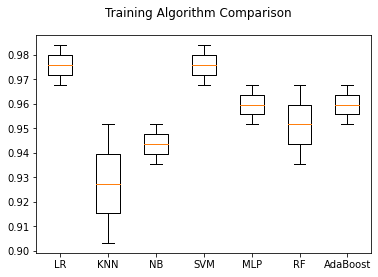

In [7]:
# Spot Check Algorithms
models = []
models.append(('LR',  LogisticRegression(multi_class = 'multinomial', C = 0.3)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 1)))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(decision_function_shape = 'ovo')))
models.append(('MLP', MLPClassifier(hidden_layer_sizes = (50,50,50),max_iter = 200)))
models.append(('RF',  RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(LogisticRegression())))

# evaluate each model in turn
training_results = []
names = []

print("Training Scores")
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits = 2)
    training_cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring = 'accuracy')
    training_results.append(training_cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, training_cv_results.mean(), training_cv_results.std())
    print(msg)

# Compare Algorithms Accuracy
red_circle = dict(markerfacecolor='red', marker='o')
fig = plt.figure()
fig.suptitle('Training Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(training_results, flierprops = red_circle)
ax.set_xticklabels(names)
plt.show()

Choosing the top two models to do an in depth evaluation

In [8]:
#Logistic Regression
lr = LogisticRegression(multi_class = 'multinomial', C = 0.3)

lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

Logistic Regression Report
Accuracy: 0.9814814814814815
F1 score: 0.9815749306918357
Recall: 0.9814814814814815
Precision: 0.982716049382716

 logistic regression clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



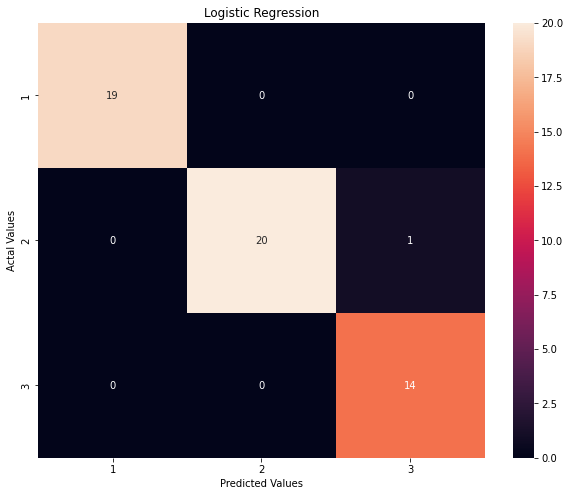

In [9]:
print('Logistic Regression Report')
print ('Accuracy:', accuracy_score(y_test, lr_pred))
print ('F1 score:', f1_score(y_test, lr_pred,average='weighted'))
print ('Recall:', recall_score(y_test, lr_pred,
                              average='weighted'))
print ('Precision:', precision_score(y_test, lr_pred,
                                    average='weighted'))
print ('\n logistic regression clasification report:\n', classification_report(y_test, lr_pred))

cm = confusion_matrix(y_test, lr_pred)
cm_df = pd.DataFrame(cm, index = ['1', '2', '3'],
                     columns=['1', '2', '3'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt = 'g')
plt.title('Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [10]:
#Support Vector Machine
svm = SVC(decision_function_shape = 'ovo')

svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

Support Vector Machine Report
Accuracy: 0.9814814814814815
F1 score: 0.9813538775640411
Recall: 0.9814814814814815
Precision: 0.9823232323232324

 Support Vector Machine clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



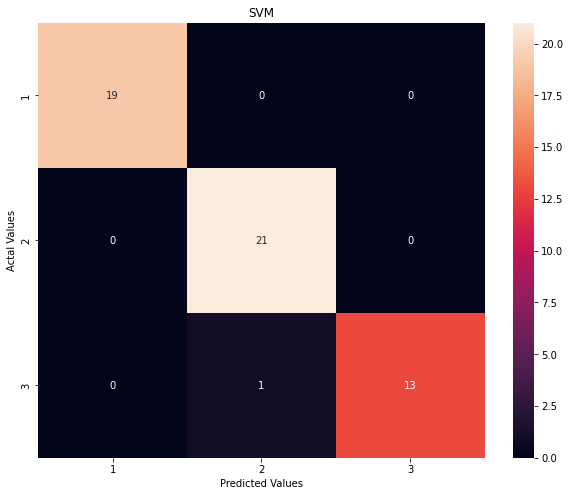

In [11]:
print('Support Vector Machine Report')
print ('Accuracy:', accuracy_score(y_test, svm_pred))
print ('F1 score:', f1_score(y_test, svm_pred,average='weighted'))
print ('Recall:', recall_score(y_test, svm_pred,
                              average='weighted'))
print ('Precision:', precision_score(y_test, svm_pred,
                                    average='weighted'))
print ('\n Support Vector Machine clasification report:\n', classification_report(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred)
cm_df = pd.DataFrame(cm, index = ['1', '2', '3'],
                     columns=['1', '2', '3'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt = 'g')
plt.title('SVM')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()